In [1]:
# import Agros Suite
from agrossuite import agros
from agrossuite.vtk_tools import view_geometry, view_scalar

import matplotlib.pylab as pl

In [2]:
# problem
problem = agros.problem(clear = True)
problem.coordinate_type = "planar"
problem.mesh_type = "triangle"

# parameters
problem.parameters["kr"] = 0.025
problem.parameters["kx"] = 0.125
problem.parameters["ky"] = 0.1675
problem.parameters["pr"] = 0.015
problem.parameters["px"] = -0.125
problem.parameters["py"] = 0.125

# fields
# current
current = problem.field("current")
current.analysis_type = "steadystate"
current.matrix_solver = "external_plugin"
current.number_of_refinements = 1
current.polynomial_order = 2
current.adaptivity_type = "disabled"
current.solver = "linear"

# boundaries
current.add_boundary("Neumann", "current_inward_current_flow", {"current_inward_current_flow" : 0})
current.add_boundary("Source", "current_potential", {"current_potential" : 1e-6})
current.add_boundary("Ground", "current_potential", {"current_potential" : 0})

# materials
current.add_material("Copper", {"current_conductivity" : 5.7e+07})

# geometry
geometry = problem.geometry()
geometry.add_edge(-0.25, 0.2, 0.25, 0.325, boundaries = {"current" : "Neumann"})
geometry.add_edge(0.25, 0.2, 0.25, 0.325, boundaries = {"current" : "Neumann"})
geometry.add_edge(0.25, 0.15, 0.25, 0.025, boundaries = {"current" : "Neumann"})
geometry.add_edge(-0.25, 0.1, -0.25, 0.025, boundaries = {"current" : "Neumann"})
geometry.add_edge(-0.25, 0.2, -0.25, 0.15, boundaries = {"current" : "Neumann"})
geometry.add_edge(-0.275, 0.15, -0.25, 0.15, boundaries = {"current" : "Neumann"})
geometry.add_edge(-0.275, 0.15, -0.275, 0.1, boundaries = {"current" : "Ground"})
geometry.add_edge(-0.275, 0.1, -0.25, 0.1, boundaries = {"current" : "Neumann"})
geometry.add_edge(-0.275, 0.025, -0.25, 0.025, boundaries = {"current" : "Neumann"})
geometry.add_edge(0.25, 0.025, 0.275, 0.025, boundaries = {"current" : "Neumann"})
geometry.add_edge(0.275, 0.2, 0.275, 0.15, boundaries = {"current" : "Source"})
geometry.add_edge(0.25, 0.15, 0.275, 0.15, boundaries = {"current" : "Neumann"})
geometry.add_edge(0.25, 0.2, 0.275, 0.2, boundaries = {"current" : "Neumann"})
geometry.add_edge("px+pr", "py", "px", "py+pr", angle = 90, boundaries = {"current" : "Neumann"})
geometry.add_edge("px", "py+pr", "px-pr", "py", angle = 90, boundaries = {"current" : "Neumann"})
geometry.add_edge(-0.275, 0.025, -0.275, 0, boundaries = {"current" : "Ground"})
geometry.add_edge(-0.275, 0, "px-pr", 0, boundaries = {"current" : "Neumann"})
geometry.add_edge("px+pr", 0, 0.275, 0, boundaries = {"current" : "Neumann"})
geometry.add_edge(0.275, 0.025, 0.275, 0, boundaries = {"current" : "Source"})
geometry.add_edge("px-pr", "py", "px-pr", 0, boundaries = {"current" : "Neumann"})
geometry.add_edge("px+pr", "py", "px+pr", 0, boundaries = {"current" : "Neumann"})
geometry.add_edge("kx", "ky-kr", "kx+kr", "ky", angle = 90, boundaries = {"current" : "Neumann"})
geometry.add_edge("kx+kr", "ky", "kx", "ky+kr", angle = 90, boundaries = {"current" : "Neumann"})
geometry.add_edge("kx", "ky+kr", "kx-kr", "ky", angle = 90, boundaries = {"current" : "Neumann"})
geometry.add_edge("kx-kr", "ky", "kx", "ky-kr", angle = 90, boundaries = {"current" : "Neumann"})

geometry.add_label(0.232317, 0.295342, area = 0.0007, materials = {"current" : "Copper"})
geometry.add_label("kx", "ky", materials = {"current" : "none"})

1

In [3]:
# recipes 
current.add_recipe_surface_integral("I_side", "current_current_conductive_real", [10], -1, -1)
current.add_recipe_surface_integral("I_center", "current_current_conductive_real", [18], -1, -1)

In [4]:
# studies
study_sweep = problem.add_study("sweep")
study_sweep.add_parameter("pr", 0.01, 0.035)
study_sweep.add_parameter("kr", 0.02, 0.05)
study_sweep.add_parameter("kx", 0.05, 0.2)
study_sweep.add_parameter("ky", 0.07, 0.25)
study_sweep.add_parameter("px", -0.2, -0.05)
study_sweep.add_parameter("py", 0.04, 0.15)
study_sweep.add_functional("OF_zero", "100*abs(2.0*I_center-I_side)/abs(I_side)", 100)
study_sweep.add_functional("OF_max", "I_side", 100)
study_sweep.clear_solution = True
study_sweep.solve_problem = True
study_sweep.settings["num_samples"] = 20
study_sweep.settings["init_method"] = "lhs"

# computation
study_sweep.solve()

Sweep: step  1 / 20
Sweep: step  2 / 20
Sweep: step  3 / 20
Sweep: step  4 / 20
Sweep: step  5 / 20
Sweep: step  6 / 20
Sweep: step  7 / 20
Sweep: step  8 / 20
Sweep: step  9 / 20
Sweep: step  10 / 20
Sweep: step  11 / 20
Sweep: step  12 / 20
Sweep: step  13 / 20
Sweep: step  14 / 20
Sweep: step  15 / 20
Sweep: step  16 / 20
Sweep: step  17 / 20
Sweep: step  18 / 20
Sweep: step  19 / 20
Sweep: step  20 / 20


In [5]:
of_sweep_zero = study_sweep.values("OF_zero")
of_sweep_max = study_sweep.values("OF_max")

Text(0, 0.5, 'OF max (A)')

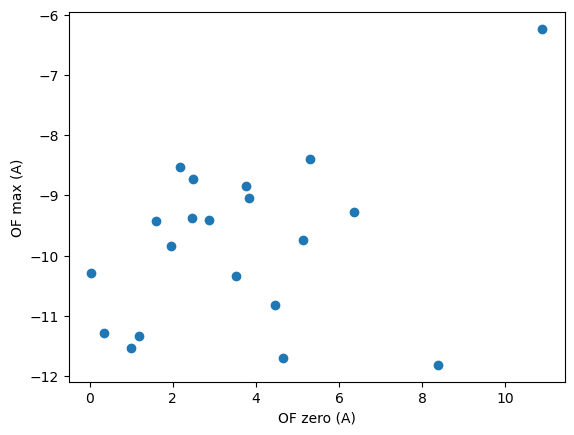

In [6]:
pl.scatter(of_sweep_zero, of_sweep_max)
pl.xlabel("OF zero (A)")
pl.ylabel("OF max (A)")

In [7]:
study_nsga2 = problem.add_study("nsga2")
study_nsga2.add_parameter("pr", 0.01, 0.035)
study_nsga2.add_parameter("kr", 0.02, 0.05)
study_nsga2.add_parameter("kx", 0.05, 0.2)
study_nsga2.add_parameter("ky", 0.07, 0.25)
study_nsga2.add_parameter("px", -0.2, -0.05)
study_nsga2.add_parameter("py", 0.04, 0.15)
study_nsga2.add_functional("OF_zero", "100*abs(2.0*I_center-I_side)/abs(I_side)", 100)
study_nsga2.add_functional("OF_max", "I_side", 100)
study_nsga2.clear_solution = True
study_nsga2.solve_problem = True
study_nsga2.settings["popsize"] = 12
study_nsga2.settings["ngen"] = 20
study_nsga2.settings["pcross"] = 0.6
study_nsga2.settings["pmut"] = 0.2
study_nsga2.settings["eta_c"] = 10
study_nsga2.settings["eta_m"] = 20
study_nsga2.settings["crowdobj"] = False

# computation
study_nsga2.solve()

NSGA-II: step  1 / 240


Initializing NSGA-II v0.2.1
Checking configuration
Loading backup: No backup file set
Initialization done, now performing first generation
min 0.0147429	max 0.0261231
min 0.0261231	max 0.0147429
min 0.0147429	max 0.0209488
min 0.0261231	max 0.0147429
min 0.0261231	max 0.0209488
min 0.0261231	max 0.0147429
min 0.0142049	max 0.0253009
min 0.0142049	max 0.0216353
min 0.0216353	max 0.0253009
min 0.0142049	max 0.0253009
min 0.0216353	max 0.0142049
min 0.0216353	max 0.0253009
min 0.0104561	max 0.0281395
min 0.0281395	max 0.0104561
min 0.0281395	max 0.0104561
min 0.0104561	max 0.0281395
min 0.0281395	max 0.0104561
min 0.0104561	max 0.0281395
min 0.0116114	max 0.0227538
min 0.0204387	max 0.0116114
min 0.0204387	max 0.0227538
min 0.0204387	max 0.0227538
min 0.0204387	max 0.0116114
min 0.0116114	max 0.0204387
min 0.0157791	max 0.0157791
min 0.0157791	max 0.0157791
min 0.0157791	max 0.0157791
min 0.0157791	max 0.0157791
min 0.0157791	max 0.0157791
min 0.0157791	max 0.0157791
Advancing to generati

NSGA-II: step  2 / 240
NSGA-II: step  3 / 240
NSGA-II: step  4 / 240
NSGA-II: step  5 / 240
NSGA-II: step  6 / 240
NSGA-II: step  7 / 240
NSGA-II: step  8 / 240
NSGA-II: step  9 / 240
NSGA-II: step  10 / 240
NSGA-II: step  11 / 240
Geometry: There are crossings in the geometry (red highlighted). Remove the crossings first.
Problem: Problem was not solved.
NSGA-II: step  12 / 240
NSGA-II: step  13 / 240
NSGA-II: step  14 / 240
NSGA-II: step  15 / 240
NSGA-II: step  16 / 240
NSGA-II: step  17 / 240
NSGA-II: step  18 / 240
NSGA-II: step  19 / 240
NSGA-II: step  20 / 240
NSGA-II: step  21 / 240
NSGA-II: step  22 / 240
Geometry: There are crossings in the geometry (red highlighted). Remove the crossings first.
Problem: Problem was not solved.
NSGA-II: step  23 / 240
NSGA-II: step  24 / 240
NSGA-II: step  25 / 240
NSGA-II: step  26 / 240
NSGA-II: step  27 / 240
NSGA-II: step  28 / 240
NSGA-II: step  29 / 240
NSGA-II: step  30 / 240
NSGA-II: step  31 / 240
NSGA-II: step  32 / 240
NSGA-II: ste

262885
min 0.0262885	max 0.010611
min 0.0262885	max 0.0209488
Saving backup: No backup file set
Advancing to generation 5
min 0.010196	max 0.021637
min 0.010196	max 0.0119624
min 0.021637	max 0.0119624
min 0.0105804	max 0.0119624
min 0.010196	max 0.0209488
min 0.010196	max 0.021637
min 0.0103294	max 0.0267473
min 0.0103294	max 0.0209488
min 0.0267473	max 0.0209488
min 0.0103294	max 0.0209488
min 0.0103294	max 0.0209488
min 0.0267473	max 0.0209488
Saving backup: No backup file set
Advancing to generation 6
min 0.010196	max 0.021637
min 0.010196	max 0.0119624
min 0.021637	max 0.0119624
min 0.0106288	max 0.0119624
min 0.010196	max 0.0209488
min 0.0105804	max 0.021637
min 0.0101796	max 0.0209488
min 0.0101796	max 0.0105827
min 0.0105827	max 0.0209488
min 0.0105804	max 0.0209488
min 0.0101796	max 0.0209488
min 0.0101796	max 0.0209488
Saving backup: No backup file set
Advancing to generation 7
min 0.010196	max 0.0147429
min 0.010196	max 0.0119624
min 0.01474	max 0.0119624
min 0.0106288	max 0

In [8]:
of_nsga2_zero = study_nsga2.values("OF_zero")
of_nsga2_max = study_nsga2.values("OF_max")

(-12.5, -10.0)

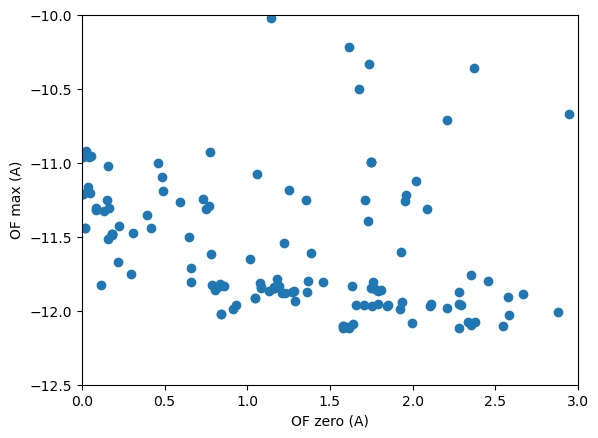

In [9]:
pl.scatter(of_nsga2_zero, of_nsga2_max)
pl.xlabel("OF zero (A)")
pl.ylabel("OF max (A)")
pl.xlim([0, 3])
pl.ylim([-12.5, -10])